In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
# Convert to pandas datetime object
train['datetime'] = pd.to_datetime(train['datetime'])

# Extract components
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [4]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


<AxesSubplot:xlabel='second', ylabel='count'>

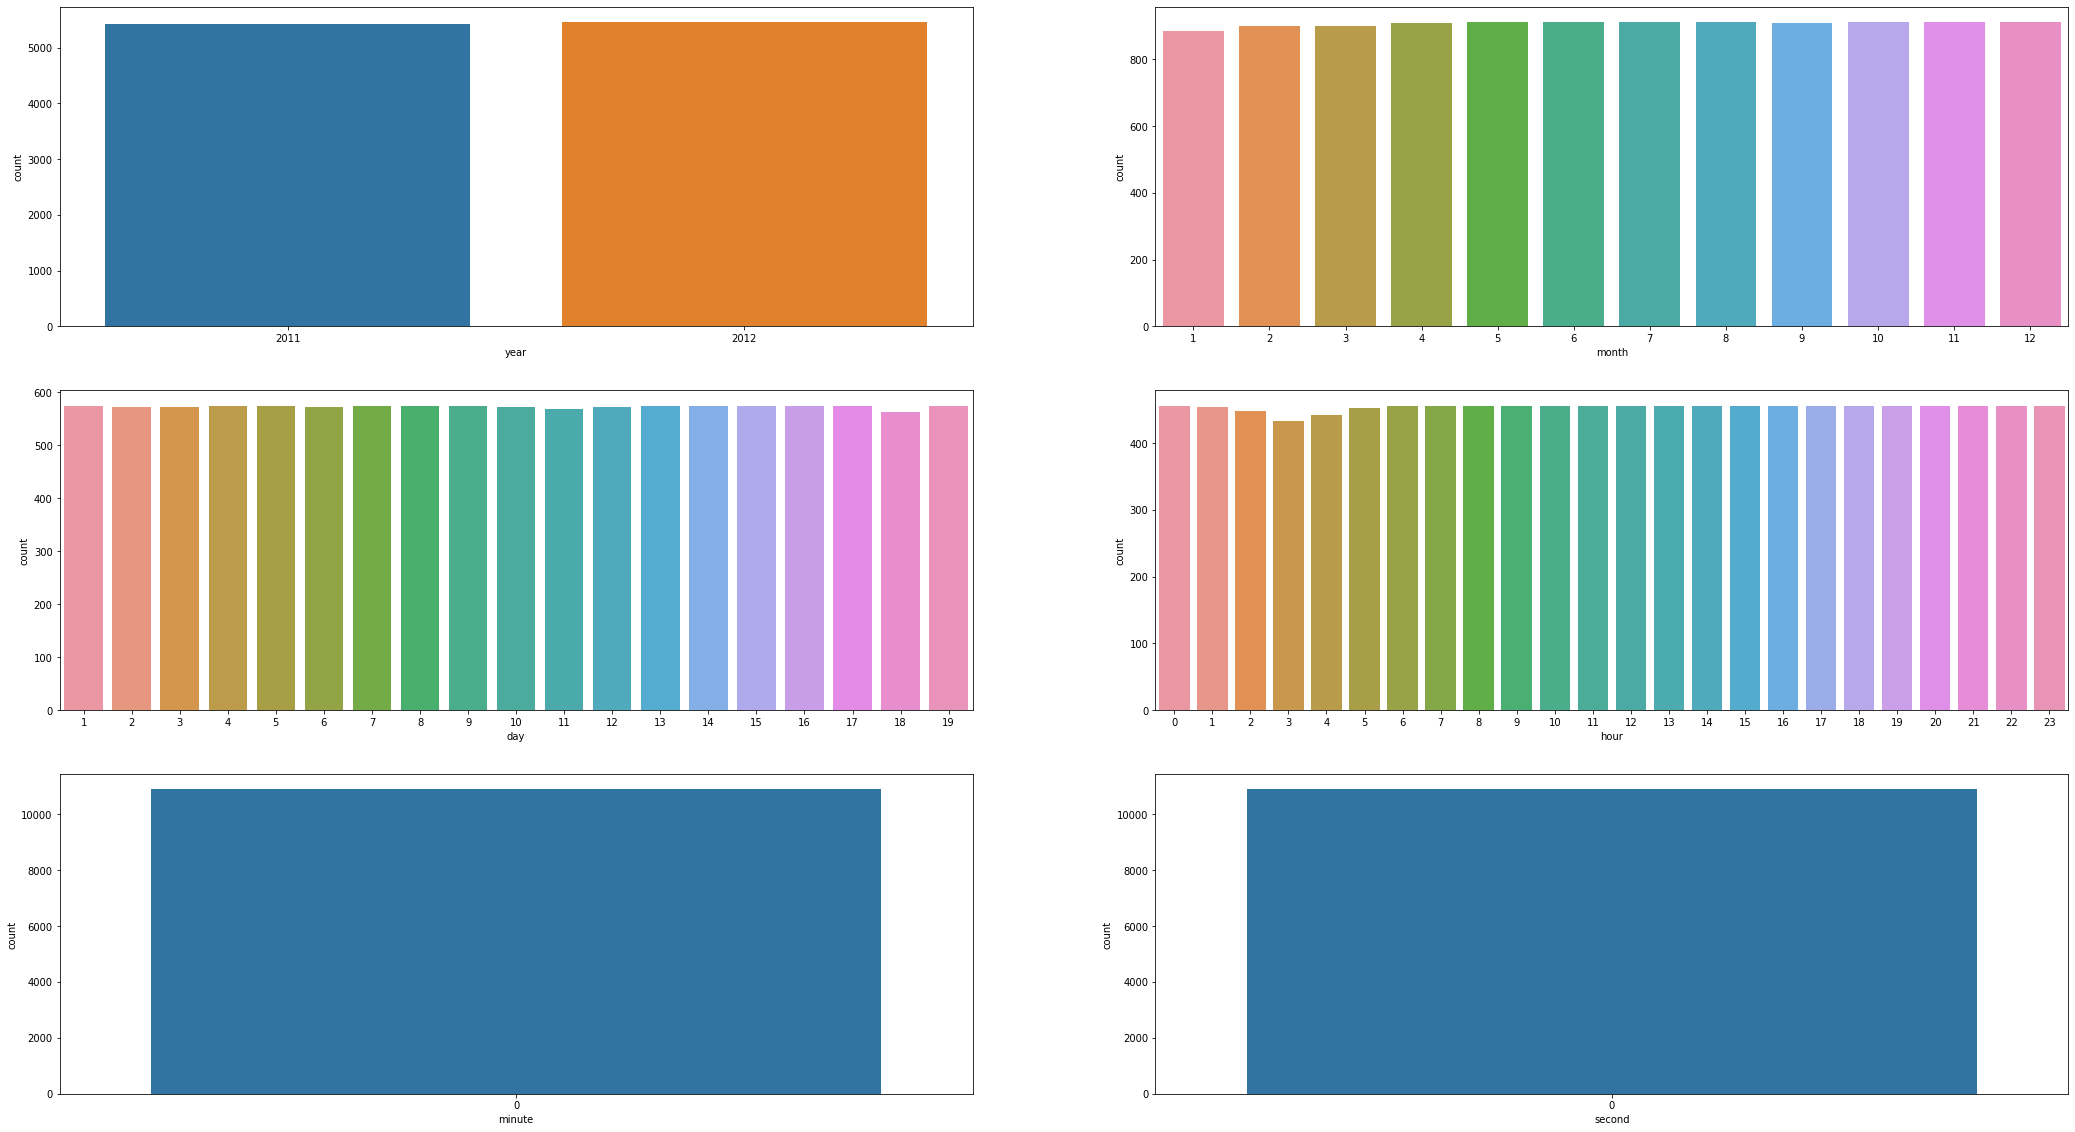

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3,2,figsize=(36,20))

sns.countplot(data=train, x="year", ax=axes[0,0])
sns.countplot(data=train, x="month", ax=axes[0,1])
sns.countplot(data=train, x="day", ax=axes[1,0])
sns.countplot(data=train, x="hour", ax=axes[1,1])
sns.countplot(data=train, x="minute", ax=axes[2,0])
sns.countplot(data=train, x="second", ax=axes[2,1])

In [6]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]
y = train['count']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error

# Predict values out of X_test
y_pred = model.predict(X_test)

# Calculate loss
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse, rmse)

20412.81365150688 142.87341828173246


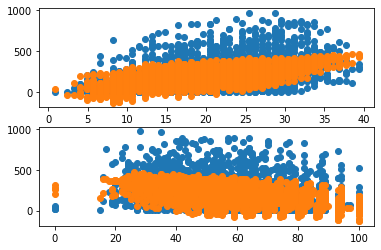

In [11]:
fig, axs = plt.subplots(2,1)

axs[0].scatter(X_test['temp'], y_test, label="true")
axs[0].scatter(X_test['temp'], y_pred, label="prediction")

axs[1].scatter(X_test['humidity'], y_test, label="true")
axs[1].scatter(X_test['humidity'], y_pred, label="prediction")


plt.show()